                      Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                                 
                                            
                                            ЛАБОРАТОРНАЯ РАБОТА №7
                                     
                                               
                                                 Вариант 4
                                                                                                                                                                           
                                                                                  
                                                                          Выполнил: Пластовец Вадим (430гр)
                                          
                                                                         
                                                  2016 год

### Цель работы: ознакомиться с методами решения дифференциальных уравнений; решить задачу коши с помощью неявной схемы Роте

### Заданное уранение
$$y"+16y'-16y=e^{x}\cdot sin(4x)$$
### Начальные условия:
$$y(0)=1$$
$$y'(0)=0$$
### Решение нужно найти на промежутке $x\in[0;2]$

В общем виде линейное уравнение второго порядка выглядит следующим образом
$$y"+cy'+dy=f(x)$$
Разобьем данное уранение второго порядка на систему двух уравнений первого порядка:
$$y_1'=y_2=g_1$$
$$y_2'=-cy_2-dy_1+f(x)=g_2$$
Решение задачи Коши эквивалентно решению системы интегральных уравнений
$$y^{i+1}_k=y^i_k+\int\limits_{x_i}^{x_{i+1}}g_kdx$$
с заданными начальными условиями
$$\;$$
Схема Роте является неявной схемой, где интегрирование заменяется квадратурной формулой с весами
$$\;$$
$$y_k^{i+1}=y_k^i+h(\alpha g_k(x^i,y_1^i...) + \beta g_k(x^{i+1},y_1^{i+1}...))$$
$$\;$$
где $h$-шаг, определяемый относительной погрешностью, $\alpha$ и $\beta$ - веса квадратурной формулы
$$\;$$
Тогда для линейного уравнения второго порядка получаем:
$$\;$$
$$y_1^{i+1}=y_1^i+h(\alpha y_2^i+\beta y_2^{i+1})$$
$$y_2^{i+1}=y_2^i+h(\alpha(-cy_2^i-dy_1^i+f(x^i))+\beta(-cy_2^{i+1}-dy_1^{i+1}+f(x^{i+1}))$$
$$\;$$
перeносим неизвестные $y_1^{i+1}$ и $y_2^{i+1}$ в левую часть и решаем относитьно них систему для всех $x^i$
$$\begin{pmatrix}1 & -h\beta \\ h\beta d & 1+h\beta c \end{pmatrix}\cdot \begin{pmatrix}y_1^{i+1} \\ y_2^{i+1} \end{pmatrix}=\begin{pmatrix}y^i_1+h\alpha y_2^i \\ y_2^i+h\alpha(-cy_2^i-dy_1^i+f(x^i))+h\beta f(x^{i+i} \end{pmatrix} $$
$$\;$$
В нашей задаче $c=16$, $d=-16$, $\alpha=\frac{1}{3}$, $\beta=\frac{2}{3}$, $f(x)=e^{x}\cdot sin(4x)$

In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
def f(x):
    return m.sin(4*x)*m.e**(x) 
c=16 ; d=-16    
a=1/3 ; b=2/3       
Y1=[1] ; Y2=[0]     #н.у.
x0=0 ; x1=2         #интервал
e=0.01              
h=1                 #начальный шаг
k=0                 #счетчик итераций
while 1:
    X=np.arange(x0,x1+2*h,h)
    n=1
    r=0
    i=0
    Y1old=Y1
    Y2old=Y2
    Y1=[1]
    Y2=[0]
    while i<(x1+h)/h:
        A=[[1.,-h*b], [d*h*b,1.+c*h*b]]
        B=[Y1[i]+h*a*Y2[i],Y2[i]+h*a*(-d*Y1[i]-c*Y2[i]+f(X[i]))+h*b*f(X[i+1])]
        C=np.linalg.solve(A,B)
        Y1.append(C[0])
        Y2.append(C[1])
        i+=1
    if k>0:
        i=0
        while i<(x1+2*h)/(2*h):
            delta=abs((Y1old[i]-Y1[2*i])/Y1old[i])    #Проверка точности
            if delta>e:
                r+=1
            i+=1
        n=r
    k+=1
    if n==0:
        break
    h=h/2
        
print("шаг",h)
print(k,"итераций")

шаг 0.015625
7 итераций


### Для сравнения найдем точное решение уравнения:
$$y=C_1e^{\lambda_1 x}+C_2e^{\lambda_2 x}+e^{x}(Acos(4x)+Bsin(4x))$$
$$\;$$
Нетрудно убедиться, что$$\;$$
$\lambda_1=-8+4\sqrt{5}$, $\lambda_2=-8-4\sqrt{5}$, $A=-\frac{8}{601}$, $B=-\frac{5}{1803}$, $C_1=\frac{(1-A)\lambda_2+A+4B}{\lambda_2-\lambda_1}$, $C_2=\frac{(-1+A)\lambda_1-A-4B}{\lambda_2-\lambda_1}$

In [4]:
l1=-8+4*m.sqrt(5)
l2=-8-4*m.sqrt(5)
c1=((1+8/601)*l2-8/601-20/1803)/((l2-l1))
c2=((-1-8/601)*l1+8/601+20/1803)/((l2-l1))
def ex(t):
    ex=c1*m.e**(l1*t)+c2*m.e**(l2*t)+m.e**(t)*((-8/601)*m.cos(4*t)+(-20/1803)*m.sin(4*t))
    return ex
T=np.arange(0,2+2*h,h)
exn=[ex(t) for t in T]

### Графики точного решения и решения, найденного по схеме Роте:

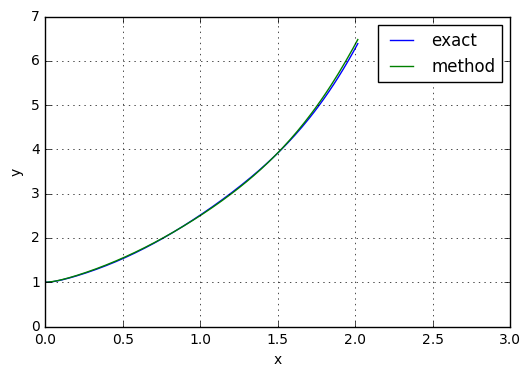

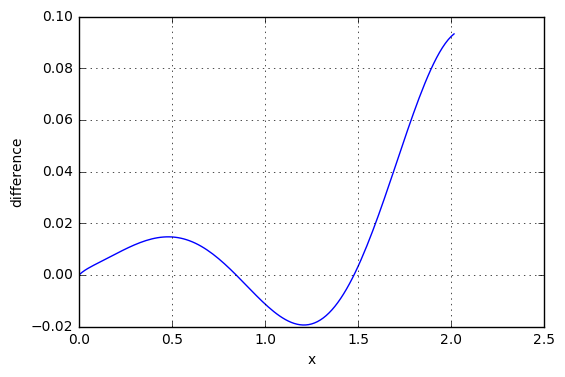

In [6]:
plt.plot(T,exn)
plt.plot(X,Y1)
plt.xlim(0,3)
plt.ylim(0,7)
plt.legend ( ('exact','method') )
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
plt.plot(X,np.array(Y1)-np.array(exn))
plt.xlabel('x')
plt.ylabel(('difference'))
plt.grid()
plt.show()    